In [1]:
import pandas as pd
import os

In [2]:
train = pd.read_csv("/Users/aashaydoiphode/Data/Data Science/Projects/Retail project/rossmann-store-sales/train.csv", low_memory=False)
store = pd.read_csv("/Users/aashaydoiphode/Data/Data Science/Projects/Retail project/rossmann-store-sales/store.csv", low_memory=False)

In [3]:
df = pd.merge(train,store, on="Store", how="left")

In [4]:
print(df.shape)
print(df.head())

(1017209, 18)
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1     

In [5]:
df = df[df["Open"]==1]

In [6]:
df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())

0           1270.0
1            570.0
2          14130.0
3            620.0
4          29910.0
            ...   
1016776      150.0
1016827      860.0
1016863      840.0
1017042     1430.0
1017190      720.0
Name: CompetitionDistance, Length: 844392, dtype: float64

In [7]:
promo_cols = ["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]
df[promo_cols] = df[promo_cols].fillna(0)

In [8]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,842206.000000,575773.000000,575773.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580,5457.979627,7.224879,2008.697747,0.498684,11.596118,1003.230065
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103,7809.437311,3.210144,5.978048,0.499999,15.307873,1005.874806
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Sales Distribution')

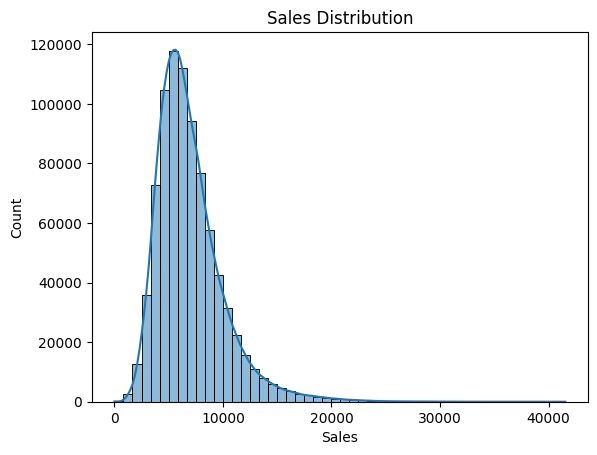

In [10]:
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Sales Distribution")

<Axes: xlabel='Customers', ylabel='Sales'>

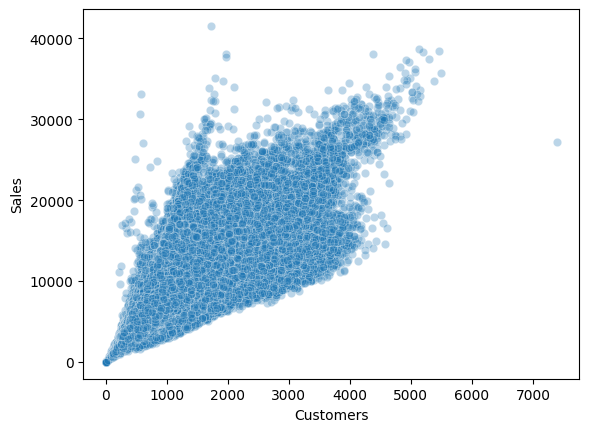

In [11]:
sns.scatterplot(x="Customers", y="Sales", data=df, alpha=0.3)

<Axes: title={'center': 'Sales by Day of Week'}, xlabel='DayOfWeek'>

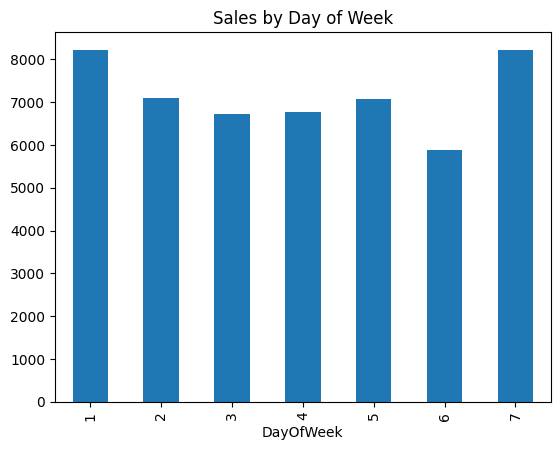

In [12]:
df.groupby("DayOfWeek")["Sales"].mean().plot(kind="bar", title="Sales by Day of Week")

<Axes: title={'center': 'Total Sales Over Time'}, xlabel='DayOfWeek'>

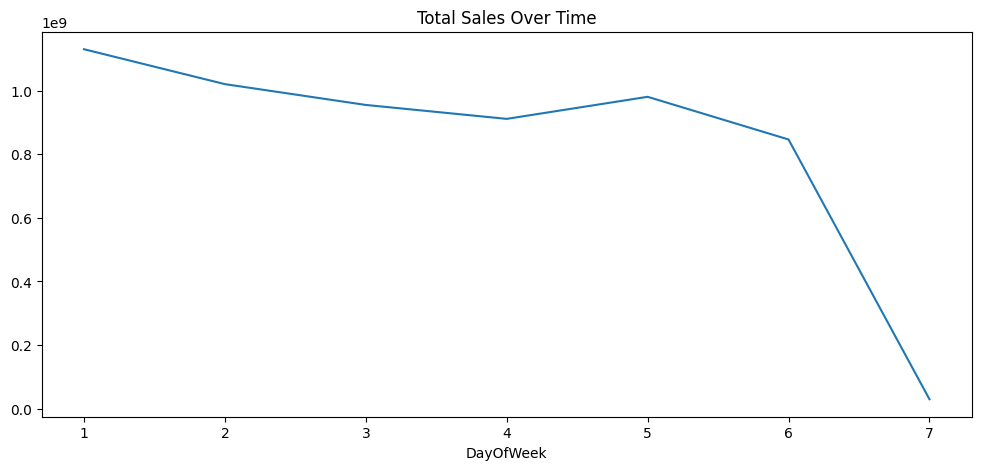

In [13]:
df.groupby("DayOfWeek")["Sales"].sum().plot(figsize=(12,5), title="Total Sales Over Time")

<Axes: xlabel='Promo', ylabel='Sales'>

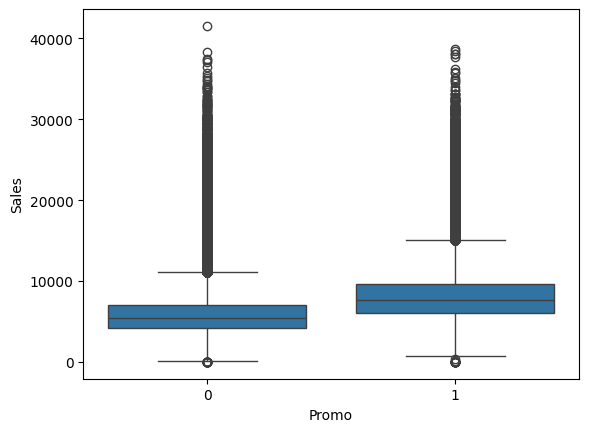

In [14]:
sns.boxplot(x="Promo", y="Sales", data=df)

<Axes: xlabel='comp_bin', ylabel='Sales'>

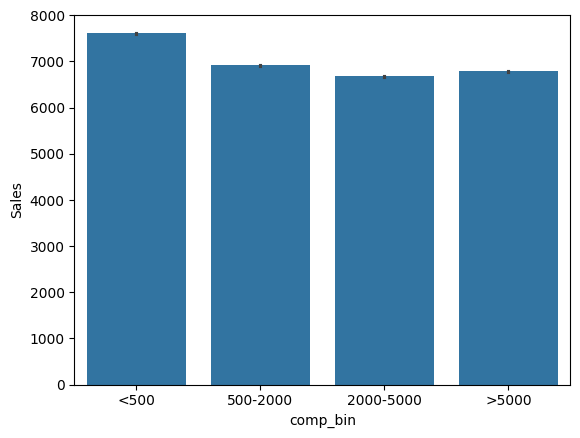

In [15]:
df["comp_bin"] = pd.cut(df["CompetitionDistance"], bins=[0,500,2000,5000,100000], labels=["<500","500-2000","2000-5000",">5000"])
sns.barplot(x="comp_bin", y="Sales", data=df)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb

In [17]:
import numpy as np

In [18]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["WeekOfYear"] = df["Date"].dt.isocalendar().week
df["Day"] = df["Date"].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [19]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [20]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["WeekOfYear"] = df["Date"].dt.isocalendar().week
df["Day"] = df["Date"].dt.day

In [21]:
df = df.sort_values(["Store","Date"])
df["Sales_lag1"] = df.groupby("Store")["Sales"].shift(1)
df["Sales_lag7"] = df.groupby("Store")["Sales"].shift(7)

In [22]:
df["Sales_roll7"] = df.groupby("Store")["Sales"].shift(1).rolling(window=7).mean()

In [23]:
df["CompSince"] = pd.to_datetime(dict(year=df["CompetitionOpenSinceYear"].replace(0,np.nan), month=df["CompetitionOpenSinceMonth"].replace(0,np.nan), day=1))
df["CompMonthsOpen"] = ((df["Date"] - df["CompSince"]) / np.timedelta64(1,"M")).fillna(0)
df["CompMonthsOpen"] = df["CompMonthsOpen"].apply(lambda x: max(x,0))

ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

In [24]:
from dateutil.relativedelta import relativedelta

def months_between(a, b):
    if pd.isna(a) or pd.isna(b): 
        return 0
    rd = relativedelta(a, b)
    return max(0, rd.years * 12 + rd.months)

df["CompMonthsOpen"] = [
    months_between(d, c) for d, c in zip(df["Date"], df["CompSince"])
]



In [25]:
df["CompSince"] = pd.to_datetime(dict(year=df["CompetitionOpenSinceYear"].replace(0,np.nan), month=df["CompetitionOpenSinceMonth"].replace(0,np.nan), day=1))
df["CompMonthsOpen"] = ((df["Date"] - df["CompSince"]) / np.timedelta64(1,"M")).fillna(0)
df["CompMonthsOpen"] = df["CompMonthsOpen"].apply(lambda x: max(x,0))

ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

In [26]:
date_y = df["Date"].dt.year
date_m = df["Date"].dt.month

comp_y = df["CompSince"].dt.year
comp_m = df["CompSince"].dt.month

months = (date_y - comp_y) * 12 + (date_m - comp_m)
df["CompMonthsOpen"] = months.fillna(0).clip(lower=0)


In [27]:
df["CompSince"] = pd.to_datetime(dict(year=df["CompetitionOpenSinceYear"].replace(0,np.nan), month=df["CompetitionOpenSinceMonth"].replace(0,np.nan), day=1))
df["CompMonthsOpen"] = ((df["Date"] - df["CompSince"]) / np.timedelta64(1,"M")).fillna(0)
df["CompMonthsOpen"] = df["CompMonthsOpen"].apply(lambda x: max(x,0))

ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

In [28]:
import pandas as pd
import numpy as np

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


df["CompSince"] = pd.to_datetime(
    dict(
        year=df["CompetitionOpenSinceYear"].replace(0, pd.NA),
        month=df["CompetitionOpenSinceMonth"].replace(0, pd.NA),
        day=1
    ),
    errors="coerce"
)


months = df["Date"].dt.to_period("M") - df["CompSince"].dt.to_period("M")
df["CompMonthsOpen"] = months.astype("float").fillna(0).clip(lower=0)


TypeError: float() argument must be a string or a real number, not 'pandas._libs.tslibs.offsets.MonthEnd'

In [29]:
y = df["Date"].dt.year - df["CompSince"].dt.year
m = df["Date"].dt.month - df["CompSince"].dt.month
df["CompMonthsOpen"] = (y*12 + m).astype("float").fillna(0).clip(lower=0)


In [30]:
df["CompSince"] = pd.to_datetime(dict(year=df["CompetitionOpenSinceYear"].replace(0,np.nan), month=df["CompetitionOpenSinceMonth"].replace(0,np.nan), day=1))
df["CompMonthsOpen"] = ((df["Date"] - df["CompSince"]) / np.timedelta64(1,"M")).fillna(0)
df["CompMonthsOpen"] = df["CompMonthsOpen"].apply(lambda x: max(x,0))

ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

In [31]:
import pandas as pd
import numpy as np


df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["CompSince"] = pd.to_datetime(
    dict(
        year=df["CompetitionOpenSinceYear"].replace(0, pd.NA),
        month=df["CompetitionOpenSinceMonth"].replace(0, pd.NA),
        day=1
    ),
    errors="coerce"
)


months = df["Date"].dt.to_period("M") - df["CompSince"].dt.to_period("M")
df["CompMonthsOpen"] = months.astype(float).fillna(0).clip(lower=0)


TypeError: float() argument must be a string or a real number, not 'pandas._libs.tslibs.offsets.MonthEnd'

In [32]:
df[["Date","CompSince","CompMonthsOpen"]].head()


,Date,CompSince,CompMonthsOpen
1014980,2013-01-02,2008-09-01,52.0
1013865,2013-01-03,2008-09-01,52.0
1012750,2013-01-04,2008-09-01,52.0
1011635,2013-01-05,2008-09-01,52.0
1009405,2013-01-07,2008-09-01,52.0


In [33]:
import pandas as pd
import numpy as np


df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["CompSince"] = pd.to_datetime(
    dict(
        year=df["CompetitionOpenSinceYear"].replace(0, pd.NA),
        month=df["CompetitionOpenSinceMonth"].replace(0, pd.NA),
        day=1
    ),
    errors="coerce"
)


date_months = df["Date"].dt.year * 12 + (df["Date"].dt.month - 1)
comp_months = df["CompSince"].dt.year * 12 + (df["CompSince"].dt.month - 1)

months_diff = (date_months - comp_months).astype("float")   # float so NaN possible
df["CompMonthsOpen"] = months_diff.fillna(0).clip(lower=0)


In [34]:
df["CompSince"] = pd.to_datetime(dict(year=df["CompetitionOpenSinceYear"].replace(0,np.nan), month=df["CompetitionOpenSinceMonth"].replace(0,np.nan), day=1))
df["CompMonthsOpen"] = ((df["Date"] - df["CompSince"]) / np.timedelta64(1,"M")).fillna(0)
df["CompMonthsOpen"] = df["CompMonthsOpen"].apply(lambda x: max(x,0))

ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

In [36]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


date_months = df["Date"].dt.year * 12 + (df["Date"].dt.month - 1)
comp_months = df["CompSince"].dt.year * 12 + (df["CompSince"].dt.month - 1)

df["CompMonthsOpen"] = (date_months - comp_months).astype("float").fillna(0).clip(lower=0)


In [37]:
df_model = df.dropna()

In [38]:
features = ["Store","DayOfWeek","Promo","SchoolHoliday","StoreType","Assortment", "CompetitionDistance","CompMonthsOpen","Year","Month","WeekOfYear", "Sales_lag1","Sales_lag7","Sales_roll7"]

In [39]:
df_model = pd.get_dummies(df_model, columns=["StoreType","Assortment","StateHoliday"], drop_first=True)

X = df_model[features + list(df_model.filter(like="StoreType_").columns) + list(df_model.filter(like="Assortment_").columns) + list(df_model.filter(like="StateHoliday_").columns)]
y = df_model["Sales"]

KeyError: "['StoreType', 'Assortment'] not in index"

In [40]:
if "WeekOfYear" in df.columns:
    df["WeekOfYear"] = df["WeekOfYear"].astype(int)


need_feats = ["Sales_lag1","Sales_lag7","Sales_roll7"]
df_model = df.dropna(subset=[c for c in need_feats if c in df.columns]).copy()


cat_cols = ["StoreType","Assortment","StateHoliday"]
num_features = [
    "Store","DayOfWeek","Promo","SchoolHoliday",
    "CompetitionDistance","CompMonthsOpen",
    "Year","Month","WeekOfYear",
    "Sales_lag1","Sales_lag7","Sales_roll7"
]


df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True, dtype=int)


dummy_cols = [c for c in df_model.columns
              if c.startswith("StoreType_") or c.startswith("Assortment_") or c.startswith("StateHoliday_")]


X_cols = [c for c in num_features if c in df_model.columns] + dummy_cols
X = df_model[X_cols]
y = df_model["Sales"]

print("X shape:", X.shape)
print("Sample columns:", X.columns[:10].tolist())


X shape: (836587, 20)
Sample columns: ['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompMonthsOpen', 'Year', 'Month', 'WeekOfYear', 'Sales_lag1']


In [41]:
split_date = "2015-06-01"
X_train, y_train = X[df_model["Date"] < split_date], y[df_model["Date"] < split_date]
X_test, y_test = X[df_model["Date"] >= split_date], y[df_model["Date"] >= split_date]

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb


model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=8, subsample=0.8, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, MAPE: {mape*100:.2f}%")


TypeError: got an unexpected keyword argument 'squared'

In [43]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, MAPE: {mape*100:.2f}%")


RMSE: 952.63, MAPE: 10.05%


<Axes: title={'center': 'Actual vs Predicted Sales (Store 1)'}, xlabel='Date'>

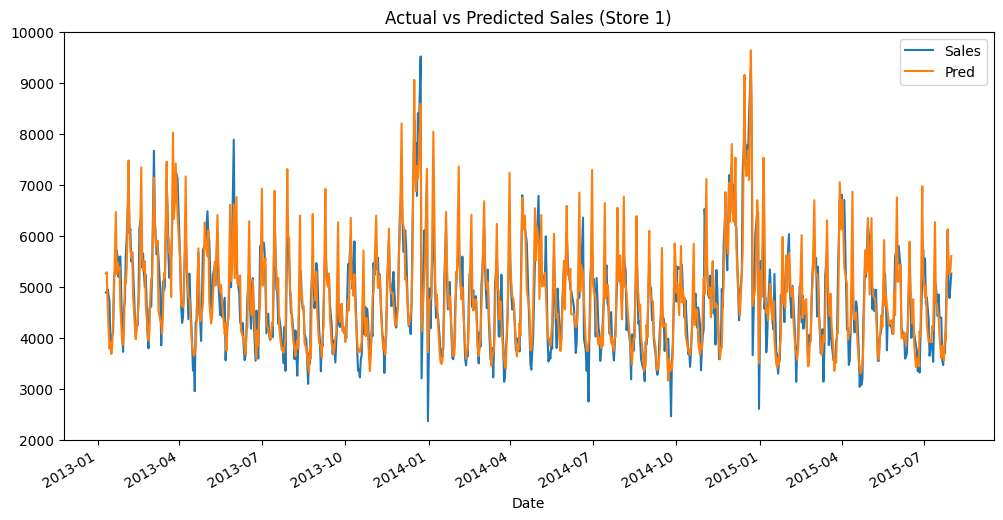

In [44]:
import matplotlib.pyplot as plt


store_sample = df_model[df_model["Store"]==1].copy()
store_sample["Pred"] = model.predict(store_sample[X_train.columns])

store_sample.set_index("Date")[["Sales","Pred"]].plot(figsize=(12,6), title="Actual vs Predicted Sales (Store 1)")


RMSE: 952.63, MAPE: 10.05%, R²: 0.906


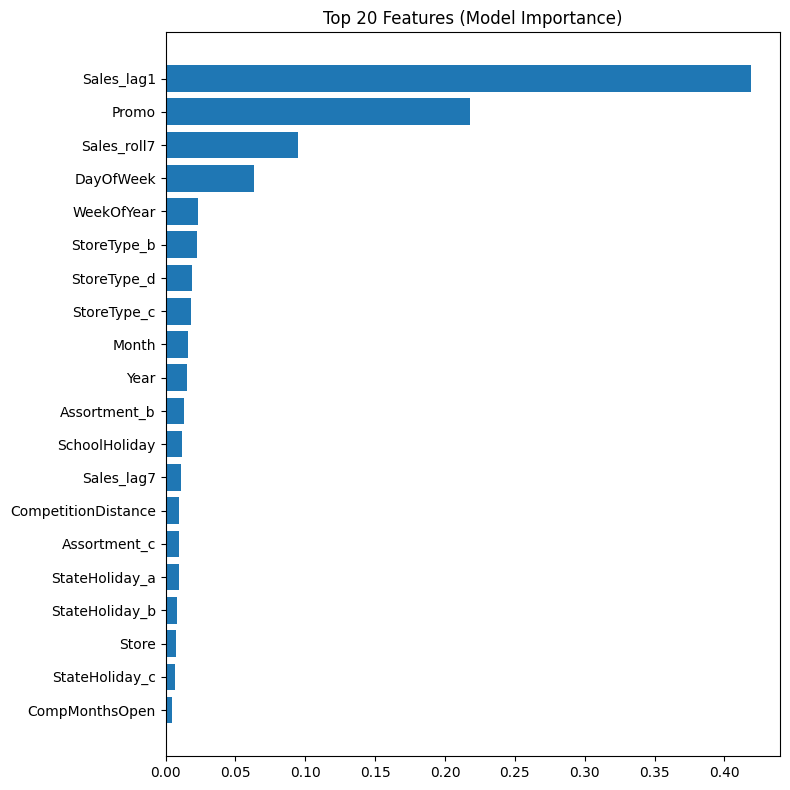

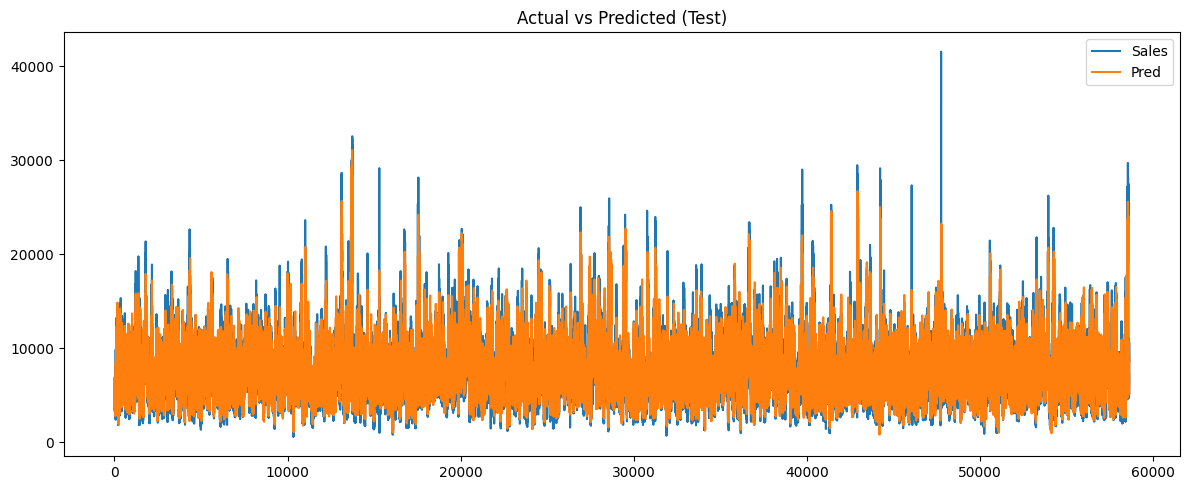

In [47]:
import os, json, joblib
os.makedirs("artifacts/figures", exist_ok=True)
os.makedirs("artifacts/model", exist_ok=True)
os.makedirs("artifacts/data", exist_ok=True)
os.makedirs("artifacts/reports", exist_ok=True)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)   # default = MSE
rmse = np.sqrt(mse)                        # manual RMSE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, MAPE: {mape:.2f}%, R²: {r2:.3f}")

import matplotlib.pyplot as plt
import numpy as np

try:
    importances = model.feature_importances_
    idx = np.argsort(importances)[::-1][:20]
    plt.figure(figsize=(8,8))
    plt.barh(np.array(X.columns)[idx][::-1], np.array(importances)[idx][::-1])
    plt.title("Top 20 Features (Model Importance)")
    plt.tight_layout()
    plt.savefig("artifacts/figures/feature_importance_top20.png", dpi=160)
    plt.show()
except Exception as e:
    print("Feature importance skip:", e)

test_series = y_test.reset_index(drop=True).to_frame("Sales")
test_series["Pred"] = y_pred
test_series.plot(figsize=(12,5), title="Actual vs Predicted (Test)")
plt.tight_layout()
plt.savefig("artifacts/figures/actual_vs_pred_test.png", dpi=160)

joblib.dump(model, "artifacts/model/model_xgb.pkl")
with open("artifacts/model/feature_columns.txt", "w") as f:
    for c in X.columns:
        f.write(c + "\n")

df_model.sample(5000, random_state=42).to_csv("artifacts/data/rossmann_processed_sample.csv", index=False)


In [46]:
pip install --upgrade scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
import json
metrics = {"rmse": float(rmse), "mape_pct": float(mape), "r2": float(r2)}
with open("artifacts/reports/metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)
